Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Import Data

In [2]:
df = pd.read_csv('train-data.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
del df['Unnamed: 0']

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Extract Brand and Model from Name

In [7]:
brand = []
model = []
for i in df['Name']:
    l=[]
    try:
        l = i.split(" ")
        if(l[0]=="Land"):
            brand.append(l[0] + " " + l[1])
            model.append(l[2])
        else:
            brand.append(l[0])
            model.append(l[1])
    except:
        continue
    

In [8]:
df['Brand'] = brand
df['Model'] = model

In [9]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


In [10]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Brand                   0
Model                   0
dtype: int64

In [11]:
del df['New_Price']


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.shape

(5975, 14)

In [15]:
x = dict(df['Brand'].value_counts())
del_brand =[]
for i in x:
    if x[i]<50:
        del_brand.append(i)
del_brand

['Jaguar',
 'Mitsubishi',
 'Mini',
 'Fiat',
 'Volvo',
 'Porsche',
 'Jeep',
 'Datsun',
 'Force',
 'ISUZU',
 'Smart',
 'Ambassador',
 'Isuzu',
 'Bentley',
 'Lamborghini']

In [16]:
for i in del_brand:
    df.drop(df[df['Brand']==i].index,inplace=True)

In [17]:
df.shape

(5780, 14)

In [18]:
df['Model'].value_counts()

Swift      343
City       265
i20        247
Verna      170
Innova     164
          ... 
Venture      1
XUV300       1
Beetle       1
Tiguan       1
WR-V         1
Name: Model, Length: 174, dtype: int64

In [19]:
x = dict(df['Model'].value_counts())
del_model =[]
for i in x:
    if x[i]<20:
        del_model.append(i)
del_model

['Ameo',
 'Eeco',
 'Cruze',
 'GLA',
 'Accent',
 'Freelander',
 'S',
 'Santa',
 'A-Star',
 'Mobilio',
 'Manza',
 'Ikon',
 'Bolero',
 'X3',
 'Aveo',
 'Elite',
 'KUV',
 '7',
 'CLA',
 'Ssangyong',
 '800',
 'GLE',
 'Optra',
 'B',
 'Discovery',
 'Tiago',
 'Fabia',
 'Camry',
 'GL-Class',
 'Spark',
 'Getz',
 'TUV',
 'Safari',
 'Enjoy',
 'GLC',
 'A',
 'Sail',
 'Passat',
 '6',
 'Yeti',
 'Ignis',
 'Thar',
 'X6',
 'Sonata',
 'Esteem',
 'Quanto',
 'Tigor',
 'Pulse',
 'Scala',
 'S-Class',
 'Sumo',
 'BRV',
 'CrossPolo',
 'R-Class',
 'Hexa',
 'Verito',
 'Tucson',
 'Qualis',
 'Fluence',
 'Aspire',
 'A3',
 'Bolt',
 'WRV',
 '1',
 'Freestyle',
 'X-Trail',
 'A7',
 'C-Class',
 'Nexon',
 'NuvoSport',
 'TT',
 'Koleos',
 'SLK-Class',
 'BR-V',
 'Captur',
 'S-Cross',
 'Xenon',
 'Tavera',
 'Jeep',
 'Logan',
 'Z4',
 'GLS',
 'Lodgy',
 'SLC',
 'Renault',
 'Teana',
 'A8',
 'Captiva',
 'RS5',
 'Classic',
 'Versa',
 'SL-Class',
 '1000',
 'Fusion',
 'Mustang',
 'Evalia',
 'CLS-Class',
 'Platinum',
 'Venture',
 'XUV300',

In [20]:
del_model

['Ameo',
 'Eeco',
 'Cruze',
 'GLA',
 'Accent',
 'Freelander',
 'S',
 'Santa',
 'A-Star',
 'Mobilio',
 'Manza',
 'Ikon',
 'Bolero',
 'X3',
 'Aveo',
 'Elite',
 'KUV',
 '7',
 'CLA',
 'Ssangyong',
 '800',
 'GLE',
 'Optra',
 'B',
 'Discovery',
 'Tiago',
 'Fabia',
 'Camry',
 'GL-Class',
 'Spark',
 'Getz',
 'TUV',
 'Safari',
 'Enjoy',
 'GLC',
 'A',
 'Sail',
 'Passat',
 '6',
 'Yeti',
 'Ignis',
 'Thar',
 'X6',
 'Sonata',
 'Esteem',
 'Quanto',
 'Tigor',
 'Pulse',
 'Scala',
 'S-Class',
 'Sumo',
 'BRV',
 'CrossPolo',
 'R-Class',
 'Hexa',
 'Verito',
 'Tucson',
 'Qualis',
 'Fluence',
 'Aspire',
 'A3',
 'Bolt',
 'WRV',
 '1',
 'Freestyle',
 'X-Trail',
 'A7',
 'C-Class',
 'Nexon',
 'NuvoSport',
 'TT',
 'Koleos',
 'SLK-Class',
 'BR-V',
 'Captur',
 'S-Cross',
 'Xenon',
 'Tavera',
 'Jeep',
 'Logan',
 'Z4',
 'GLS',
 'Lodgy',
 'SLC',
 'Renault',
 'Teana',
 'A8',
 'Captiva',
 'RS5',
 'Classic',
 'Versa',
 'SL-Class',
 '1000',
 'Fusion',
 'Mustang',
 'Evalia',
 'CLS-Class',
 'Platinum',
 'Venture',
 'XUV300',

In [21]:
for i in del_model:
    df.drop(df[df['Model']==i].index,inplace=True)

In [22]:
df.shape

(5080, 14)

In [23]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4


Convert Some Features in Float

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5080 non-null   object 
 1   Location           5080 non-null   object 
 2   Year               5080 non-null   int64  
 3   Kilometers_Driven  5080 non-null   int64  
 4   Fuel_Type          5080 non-null   object 
 5   Transmission       5080 non-null   object 
 6   Owner_Type         5080 non-null   object 
 7   Mileage            5080 non-null   object 
 8   Engine             5080 non-null   object 
 9   Power              5080 non-null   object 
 10  Seats              5080 non-null   float64
 11  Price              5080 non-null   float64
 12  Brand              5080 non-null   object 
 13  Model              5080 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 595.3+ KB


In [25]:
m = []
n = []
for i in df['Mileage']:
    m = i.split(" ")
    n.append(float(m[0]))

df['Mileage_int'] = n
del df['Mileage']

In [26]:
m = []
n = []
for i in df['Engine']:
    m = i.split(" ")
    n.append(float(m[0]))

df['Engine_int'] = n
del df['Engine']

In [27]:
m = []
n = []
for i in df['Power']:
    try:
        m = i.split(" ")
        n.append(float(m[0]))
    except:
        n.append(0)

df['Power_int'] = n
del df['Power']

In [28]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,15.20,1968.0,140.80


Delete Unwanted Values

In [29]:
df['Fuel_Type'].value_counts()

Diesel    2646
Petrol    2375
CNG         49
LPG         10
Name: Fuel_Type, dtype: int64

In [30]:
df = df[~(df['Fuel_Type']=="LPG")]

In [31]:
df['Fuel_Type'].value_counts()

Diesel    2646
Petrol    2375
CNG         49
Name: Fuel_Type, dtype: int64

In [32]:
df['Transmission'].value_counts()

Manual       3754
Automatic    1316
Name: Transmission, dtype: int64

In [33]:
df['Owner_Type'].value_counts()

First             4190
Second             789
Third               85
Fourth & Above       6
Name: Owner_Type, dtype: int64

In [34]:
df = df[~(df['Owner_Type']=="Fourth & Above")]

In [35]:
df['Owner_Type'].value_counts()

First     4190
Second     789
Third       85
Name: Owner_Type, dtype: int64

In [36]:
df['Seats'].value_counts()

5.0    4392
7.0     508
8.0     121
4.0      39
9.0       2
6.0       1
0.0       1
Name: Seats, dtype: int64

In [37]:
df = df[~((df['Seats'] <3) | (df['Seats'] > 8))]

In [38]:
df['Seats'].value_counts()

5.0    4392
7.0     508
8.0     121
4.0      39
6.0       1
Name: Seats, dtype: int64

In [39]:
df.shape

(5061, 14)

In [40]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,15.20,1968.0,140.80


Finding Outliers

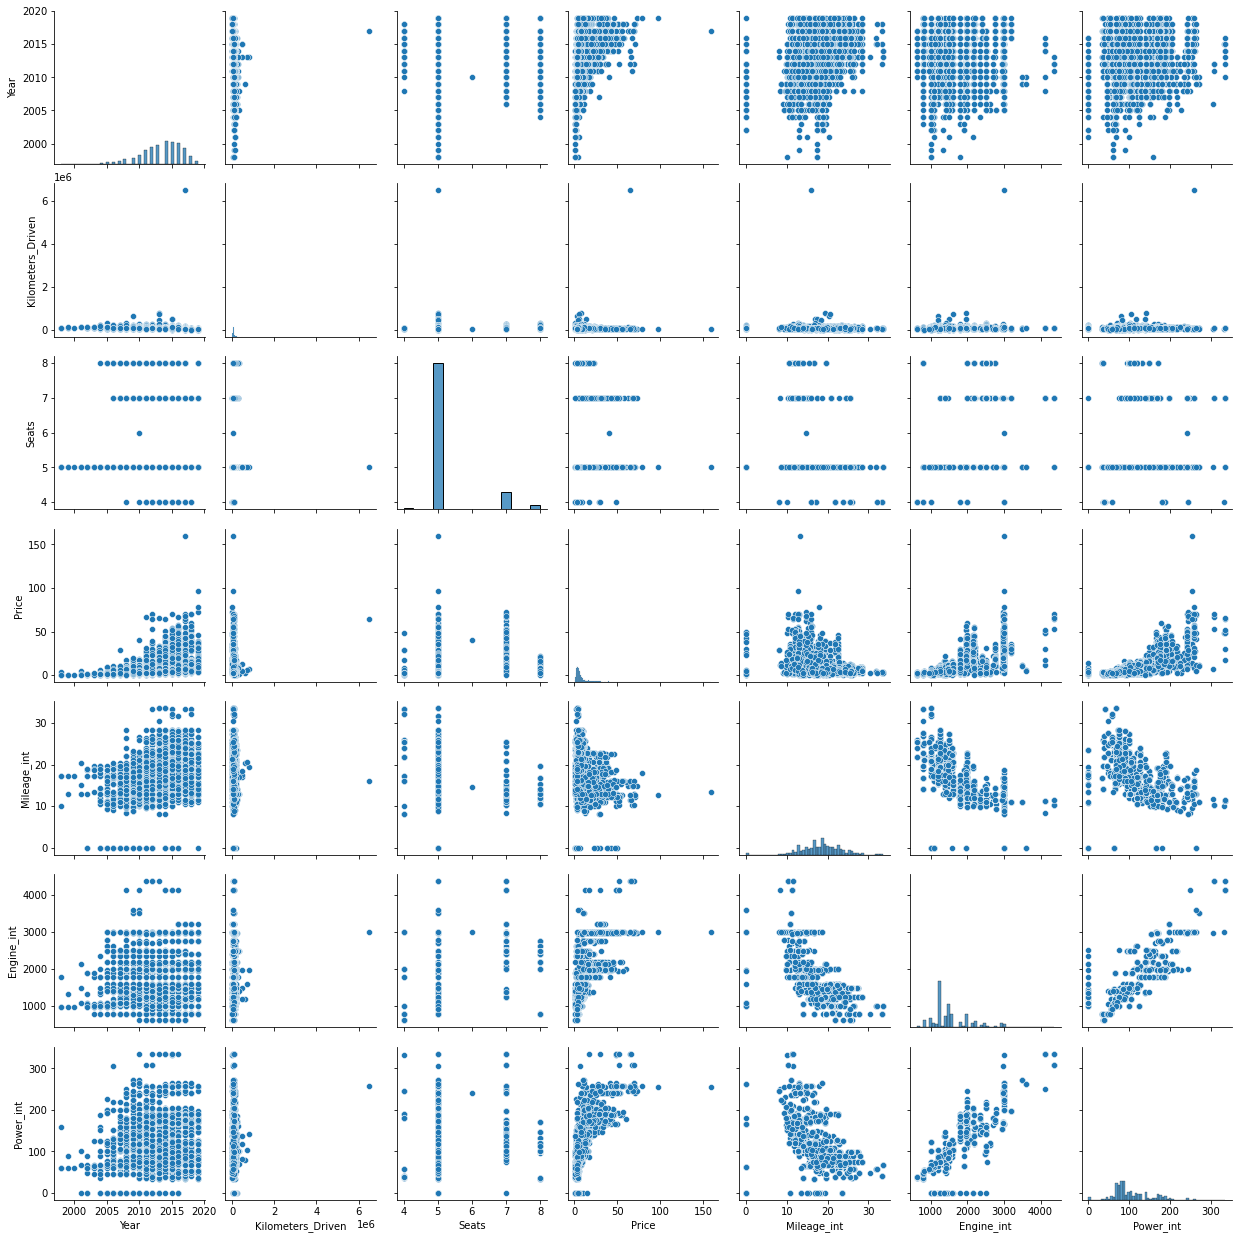

In [41]:
sn.pairplot(df)

Year


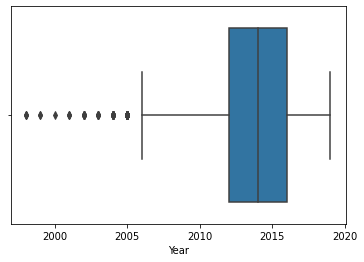

Kilometers_Driven


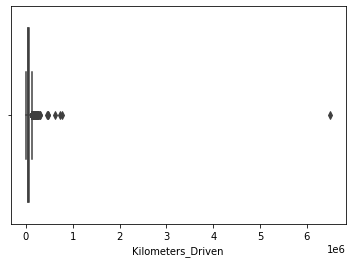

Seats


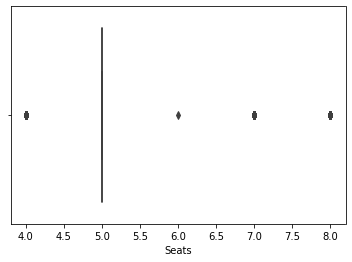

Price


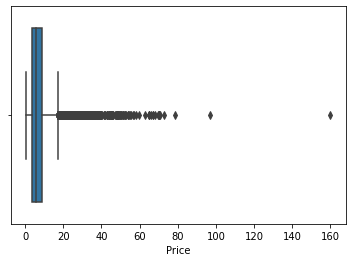

Mileage_int


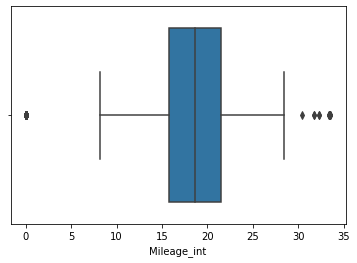

Engine_int


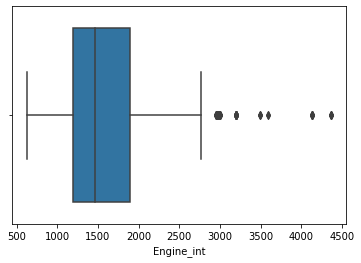

Power_int


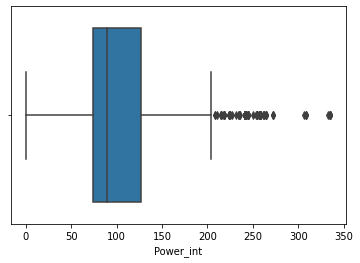

In [42]:
def box_plot(df,var):
    sn.boxplot(x=df[var])
    plt.show()

x=["Year","Kilometers_Driven","Seats","Price","Mileage_int","Engine_int","Power_int"]
for i in x:
    print(i)
    box_plot(df,i)

Delete Outlier in Kilometers_driven

In [43]:
df[(df['Kilometers_Driven'] > 1000000)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,5.0,65.0,BMW,X5,15.97,2993.0,258.0


In [44]:
df = df[~(df['Kilometers_Driven'] > 1000000)]

Outlier Treatement in Mileage_int

In [45]:
miss_mlg_df = df[(df['Mileage_int'] > 35) | (df['Mileage_int'] <5)]
miss_mlg_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,5.0,1.30,Hyundai,Santro,0.0,1086.0,0.00
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,5.0,1.75,Hyundai,Santro,0.0,1086.0,0.00
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,5.0,1.50,Hyundai,Santro,0.0,1086.0,0.00
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,5.0,5.45,Volkswagen,Jetta,0.0,1968.0,0.00
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,5.0,3.35,Hyundai,Santro,0.0,1086.0,0.00
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,5.0,38.99,Mercedes-Benz,New,0.0,1950.0,181.43
631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,5.0,0.65,Hyundai,Santro,0.0,1086.0,0.00
647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,5.0,0.80,Hyundai,Santro,0.0,1086.0,0.00
707,Mercedes-Benz M-Class ML 350 4Matic,Pune,2014,120000,Diesel,Automatic,First,5.0,30.00,Mercedes-Benz,M-Class,0.0,2987.0,165.00
996,Hyundai Santro Xing GL,Pune,2008,93000,Petrol,Manual,First,5.0,1.45,Hyundai,Santro,0.0,1086.0,62.00


In [46]:
df2 = df

In [47]:
# miss_mlg_df['Mileage_int'] = np.where(miss_mlg_df['Model']=="Santro",avg_mean,miss_mlg_df['Mileage_int'])

In [48]:
df2 = df2[~((df2["Model"]=="Santro") & (df2['Mileage_int'] < 1))]

In [49]:
df2[df2['Model']=="Santro"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3240832303.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Santro"].mean()


Year                  2008.000000
Kilometers_Driven    71160.341463
Seats                    5.000000
Price                    1.748537
Mileage_int             17.484390
Engine_int            1086.000000
Power_int               28.921951
dtype: float64

In [50]:
avg = 17.48
df['Mileage_int'] = np.where((df['Model'] == "Santro") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1102240276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_int'] = np.where((df['Model'] == "Santro") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])


In [51]:
df2 = df2[~((df2["Model"]=="M-Class") & (df2['Mileage_int'] < 1))]
df2[df2['Model']=="M-Class"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/4090156462.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="M-Class"].mean()


Year                  2012.333333
Kilometers_Driven    63979.800000
Seats                    5.000000
Price                   26.252667
Mileage_int             12.992000
Engine_int            2649.400000
Power_int              221.908000
dtype: float64

In [52]:
avg=13
df['Mileage_int'] = np.where((df['Model'] == "M-Class") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/981460285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_int'] = np.where((df['Model'] == "M-Class") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])


In [53]:
df2 = df2[~((df2["Model"]=="Superb") & (df2['Mileage_int'] < 1))]
df2[df2['Model']=="Superb"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/286265368.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Superb"].mean()


Year                  2012.595745
Kilometers_Driven    64753.106383
Seats                    5.000000
Price                   10.429149
Mileage_int             14.363617
Engine_int            1890.425532
Power_int              161.092766
dtype: float64

In [54]:
avg=14.36
df['Mileage_int'] = np.where((df['Model'] == "Superb") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1629143014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_int'] = np.where((df['Model'] == "Superb") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])


In [55]:
df2 = df2[~((df2["Model"]=="Baleno") & (df2['Mileage_int'] < 1))]
df2[df2['Model']=="Baleno"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/2686782636.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Baleno"].mean()


Year                  2016.290323
Kilometers_Driven    31580.967742
Seats                    5.000000
Price                    6.773871
Mileage_int             22.244677
Engine_int            1217.000000
Power_int               81.741935
dtype: float64

In [56]:
avg=22.24
df['Mileage_int'] = np.where((df['Model'] == "Baleno") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1912226713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_int'] = np.where((df['Model'] == "Baleno") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])


In [57]:
df2 = df2[~((df2["Model"]=="New") & (df2['Mileage_int'] < 1))]
df2[df2['Model']=="New"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/365827919.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="New"].mean()


Year                  2012.920792
Kilometers_Driven    52967.702970
Seats                    5.158416
Price                   19.340396
Mileage_int             15.537822
Engine_int            2076.217822
Power_int              171.835545
dtype: float64

In [58]:
avg=15.53
df['Mileage_int'] = np.where((df['Model'] == "New") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/871110478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_int'] = np.where((df['Model'] == "New") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])


In [59]:
df2 = df2[~((df2["Model"]=="Jetta") & (df2['Mileage_int'] < 1))]
df2[df2['Model']=="Jetta"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/4071502795.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Jetta"].mean()


Year                  2012.695652
Kilometers_Driven    85481.478261
Seats                    5.000000
Price                    8.372609
Mileage_int             16.760000
Engine_int            1917.826087
Power_int              125.786957
dtype: float64

In [60]:
avg=16.76
df['Mileage_int'] = np.where((df['Model'] == "Jetta") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/888134846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_int'] = np.where((df['Model'] == "Jetta") & (df['Mileage_int'] < 1) , avg , df['Mileage_int'])


In [61]:
df[df['Mileage_int'] < 1]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int


Outlier in Power_int

In [62]:
df2 = df

In [63]:
df[(df['Power_int'] < 10)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,5.0,2.00,Ford,Fiesta,17.80,1399.0,0.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,5.0,1.30,Hyundai,Santro,17.48,1086.0,0.0
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,5.0,2.10,Hyundai,Santro,17.00,1086.0,0.0
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,5.0,0.85,Hyundai,Santro,17.00,1086.0,0.0
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,5.0,1.67,Hyundai,Santro,17.00,1086.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,46707,Petrol,Manual,First,5.0,0.99,Hyundai,Santro,17.00,1086.0,0.0
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,5.0,1.85,Hyundai,Santro,17.00,1086.0,0.0
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,5.0,1.20,Hyundai,Santro,17.00,1086.0,0.0
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,5.0,2.85,Skoda,Laura,17.50,1798.0,0.0


In [64]:
df2 = df2[~((df2["Model"]=="Santro") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Santro"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/2847965636.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Santro"].mean()


Year                  2009.615385
Kilometers_Driven    67135.000000
Seats                    5.000000
Price                    1.974615
Mileage_int             17.893077
Engine_int            1086.000000
Power_int               62.300000
dtype: float64

In [65]:
avg=62.3
df['Power_int'] = np.where((df['Model'] == "Santro") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3339603429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Santro") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [66]:
df[(df['Power_int'] < 10)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,5.0,2.00,Ford,Fiesta,17.80,1399.0,0.0
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,5.0,4.10,Maruti,Swift,17.80,1248.0,0.0
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,5.0,2.50,Maruti,Swift,17.80,1248.0,0.0
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,5.0,5.45,Volkswagen,Jetta,16.76,1968.0,0.0
472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,5.0,2.50,Ford,Fiesta,15.30,1596.0,0.0
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,5.0,0.75,Tata,Indica,13.50,1405.0,0.0
739,Maruti Swift VDI BSIV,Bangalore,2007,60000,Diesel,Manual,Second,5.0,3.40,Maruti,Swift,17.80,1248.0,0.0
829,Toyota Etios Liva G,Mumbai,2012,29605,Petrol,Manual,First,5.0,2.44,Toyota,Etios,18.30,1197.0,0.0
934,Toyota Etios GD,Kolkata,2012,60000,Diesel,Manual,First,5.0,2.95,Toyota,Etios,23.59,1364.0,0.0
1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,5.0,2.60,Toyota,Etios,23.59,1364.0,0.0


In [67]:
df2 = df2[~((df2["Model"]=="Swift") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Swift"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3128352072.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Swift"].mean()


Year                  2013.696319
Kilometers_Driven    60910.444785
Seats                    5.000000
Price                    4.753957
Mileage_int             21.870215
Engine_int            1240.076687
Power_int               77.890521
dtype: float64

In [68]:
avg=77.89
df['Power_int'] = np.where((df['Model'] == "Swift") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/2636379712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Swift") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [69]:
df2 = df2[~((df2["Model"]=="Etios") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Etios"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1292930051.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Etios"].mean()


Year                  2014.021277
Kilometers_Driven    59902.489362
Seats                    5.000000
Price                    4.666596
Mileage_int             20.292553
Engine_int            1383.319149
Power_int               76.909787
dtype: float64

In [70]:
avg=76.91
df['Power_int'] = np.where((df['Model'] == "Etios") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1013715466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Etios") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [71]:
df[(df['Power_int'] < 10)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,5.0,2.00,Ford,Fiesta,17.80,1399.0,0.0
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,5.0,5.45,Volkswagen,Jetta,16.76,1968.0,0.0
472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,5.0,2.50,Ford,Fiesta,15.30,1596.0,0.0
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,5.0,0.75,Tata,Indica,13.50,1405.0,0.0
1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,5.0,1.30,Maruti,Baleno,22.24,1590.0,0.0
1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,5.0,2.10,Nissan,Micra,19.50,1461.0,0.0
1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,5.0,5.00,Mercedes-Benz,E-Class,15.00,2148.0,0.0
2450,Tata Indica DLS,Kolkata,2009,75648,Diesel,Manual,First,5.0,0.82,Tata,Indica,13.50,1405.0,0.0
3290,Ford Fiesta 1.4 SXi TDCi,Hyderabad,2008,83000,Diesel,Manual,Second,5.0,2.40,Ford,Fiesta,17.80,1399.0,0.0
3589,Tata Indica DLS,Hyderabad,2005,100000,Diesel,Manual,Second,5.0,1.30,Tata,Indica,13.50,1405.0,0.0


In [72]:
df2 = df2[~((df2["Model"]=="Laura") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Laura"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/342357509.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Laura"].mean()


Year                  2010.607143
Kilometers_Driven    80971.428571
Seats                    5.000000
Price                    5.160357
Mileage_int             17.653571
Engine_int            1910.285714
Power_int              122.625000
dtype: float64

In [73]:
avg=122.62
df['Power_int'] = np.where((df['Model'] == "Laura") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1028917835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Laura") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [74]:
df2 = df2[~((df2["Model"]=="Endeavour") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Endeavour"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3720070140.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Endeavour"].mean()


Year                  2014.444444
Kilometers_Driven    71304.055556
Seats                    7.000000
Price                   20.678889
Mileage_int             11.837500
Engine_int            2807.388889
Power_int              169.908333
dtype: float64

In [75]:
avg=169.90
df['Power_int'] = np.where((df['Model'] == "Endeavour") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1343625008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Endeavour") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [76]:
df2 = df2[~((df2["Model"]=="E-Class") & (df2['Power_int'] < 1))]
df2[df2['Model']=="E-Class"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3045846905.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="E-Class"].mean()


Year                  2012.709302
Kilometers_Driven    54811.546512
Seats                    4.988372
Price                   24.701163
Mileage_int             12.557558
Engine_int            2370.965116
Power_int              204.429186
dtype: float64

In [77]:
avg=204.42
df['Power_int'] = np.where((df['Model'] == "E-Class") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/752882180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "E-Class") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [78]:
df2 = df2[~((df2["Model"]=="Baleno") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Baleno"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/2758712069.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Baleno"].mean()


Year                  2016.459016
Kilometers_Driven    30945.213115
Seats                    5.000000
Price                    6.855246
Mileage_int             22.356885
Engine_int            1210.885246
Power_int               83.081967
dtype: float64

In [79]:
avg=83.08
df['Power_int'] = np.where((df['Model'] == "Baleno") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/187294003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Baleno") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [80]:
df2 = df2[~((df2["Model"]=="CR-V") & (df2['Power_int'] < 1))]
df2[df2['Model']=="CR-V"].mean()

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3080921492.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="CR-V"].mean()


Year                  2009.8800
Kilometers_Driven    76214.5600
Seats                    5.0000
Price                    7.6744
Mileage_int             11.8040
Engine_int            2211.2000
Power_int              153.7656
dtype: float64

In [81]:
avg=153.76
df['Power_int'] = np.where((df['Model'] == "CR-V") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/593530671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "CR-V") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [82]:
df2 = df2[~((df2["Model"]=="Indica") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Indica"].mean()


C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/2271787656.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Indica"].mean()


Year                   2011.918919
Kilometers_Driven    100634.270270
Seats                     5.000000
Price                     2.073514
Mileage_int              20.503784
Engine_int             1330.486486
Power_int                67.681351
dtype: float64

In [83]:
avg=67.68
df['Power_int'] = np.where((df['Model'] == "Indica") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1550763540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Indica") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [84]:
df2 = df2[~((df2["Model"]=="Fiesta") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Fiesta"].mean()


C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/105378422.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Fiesta"].mean()


Year                  2009.648649
Kilometers_Driven    95618.648649
Seats                    5.000000
Price                    2.712973
Mileage_int             18.157027
Engine_int            1431.000000
Power_int               74.274324
dtype: float64

In [85]:
avg=74.27
df['Power_int'] = np.where((df['Model'] == "Fiesta") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/744937337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Fiesta") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [86]:
df[(df['Power_int'] < 10)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,5.0,5.45,Volkswagen,Jetta,16.76,1968.0,0.0
1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,5.0,2.10,Nissan,Micra,19.50,1461.0,0.0


In [87]:
df2 = df2[~((df2["Model"]=="Jetta") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Jetta"].mean()


C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/884261044.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Jetta"].mean()


Year                  2012.695652
Kilometers_Driven    85481.478261
Seats                    5.000000
Price                    8.372609
Mileage_int             16.760000
Engine_int            1917.826087
Power_int              125.786957
dtype: float64

In [88]:
avg=125.78
df['Power_int'] = np.where((df['Model'] == "Jetta") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1223811882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Jetta") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [89]:
df2 = df2[~((df2["Model"]=="Micra") & (df2['Power_int'] < 1))]
df2[df2['Model']=="Micra"].mean()


C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/1481040694.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2['Model']=="Micra"].mean()


Year                  2012.968750
Kilometers_Driven    59330.812500
Seats                    5.000000
Price                    3.381250
Mileage_int             20.859687
Engine_int            1321.281250
Power_int               68.607500
dtype: float64

In [90]:
avg=68.6
df['Power_int'] = np.where((df['Model'] == "Micra") & (df['Power_int'] < 1) , avg , df['Power_int'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3236050115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_int'] = np.where((df['Model'] == "Micra") & (df['Power_int'] < 1) , avg , df['Power_int'])


In [91]:
df[(df['Power_int'] < 10)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int


In [92]:
df[(df['Price']>100)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,5.0,160.0,Land Rover,Range,13.33,2993.0,255.0


In [93]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,15.20,1968.0,140.80


In [94]:
df.shape

(5060, 14)

In [95]:
df['Brand'].value_counts()

Maruti           1120
Hyundai          1025
Honda             572
Toyota            391
Volkswagen        282
Ford              272
Audi              221
BMW               216
Mercedes-Benz     205
Mahindra          193
Skoda             156
Tata              125
Renault           123
Nissan             85
Chevrolet          46
Land Rover         28
Name: Brand, dtype: int64

In [96]:
dict(df['Model'].value_counts())

{'Swift': 342,
 'City': 265,
 'i20': 246,
 'Verna': 170,
 'Innova': 162,
 'Grand': 155,
 'i10': 155,
 'Polo': 151,
 'Wagon': 148,
 'Alto': 143,
 'XUV500': 113,
 'Vento': 107,
 'Amaze': 106,
 'New': 102,
 'Fortuner': 101,
 'Figo': 100,
 '3': 98,
 'Creta': 93,
 'E-Class': 88,
 'Duster': 83,
 'A4': 77,
 'Ertiga': 75,
 'Ciaz': 71,
 'Santro': 68,
 'Corolla': 68,
 'Ritz': 64,
 '5': 63,
 'Baleno': 63,
 'Etios': 60,
 'EON': 60,
 'Scorpio': 60,
 'Brio': 60,
 'Xcent': 59,
 'Celerio': 58,
 'Jazz': 57,
 'Ecosport': 53,
 'Superb': 49,
 'A6': 49,
 'Rapid': 47,
 'Beat': 46,
 'Vitara': 43,
 'EcoSport': 42,
 'Fiesta': 40,
 'Indica': 40,
 'KWID': 40,
 'Q7': 38,
 'Endeavour': 37,
 'SX4': 37,
 'Micra': 33,
 'Civic': 32,
 'X1': 32,
 'Octavia': 31,
 'Indigo': 31,
 'Q5': 30,
 'Zen': 29,
 'Laura': 29,
 'Range': 28,
 'Q3': 27,
 'Sunny': 26,
 'CR-V': 26,
 'Terrano': 26,
 'Accord': 26,
 'Nano': 25,
 'Dzire': 24,
 'Jetta': 24,
 'M-Class': 23,
 'X5': 23,
 'Elantra': 22,
 'Zest': 21,
 'Xylo': 20,
 'Omni': 20}

In [97]:
df['Model'] = np.where(df['Model']=="Wagon","WagonR",df['Model'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/2261665111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = np.where(df['Model']=="Wagon","WagonR",df['Model'])


In [98]:
df['Model'] = np.where((df['Model']=="New") & (df['Brand']=="Mercedes-Benz"),"New C-Class",df['Model'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/2337255637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = np.where((df['Model']=="New") & (df['Brand']=="Mercedes-Benz"),"New C-Class",df['Model'])


In [99]:
df['Model'] = np.where((df['Model']=="New") & (df['Brand']=="Tata"),"New Safari",df['Model'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/968773946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = np.where((df['Model']=="New") & (df['Brand']=="Tata"),"New Safari",df['Model'])


In [100]:
df['Model'] = np.where(df['Model']=="5","5 Series",df['Model'])
df['Model'] = np.where(df['Model']=="3","3 Series",df['Model'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/521449726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = np.where(df['Model']=="5","5 Series",df['Model'])
C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/521449726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = np.where(df['Model']=="3","3 Series",df['Model'])


In [101]:
df['Model'] = np.where(df['Model']=="Range","Range Rover",df['Model'])

C:\Users\Sneh\AppData\Local\Temp/ipykernel_4480/3379833265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = np.where(df['Model']=="Range","Range Rover",df['Model'])


In [102]:
del df['Name']

In [103]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage_int,Engine_int,Power_int
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,WagonR,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,15.20,1968.0,140.80


In [104]:
df.corr()

,Year,Kilometers_Driven,Seats,Price,Mileage_int,Engine_int,Power_int
Year,1.000000,-0.429979,0.004184,0.312781,0.289229,-0.064670,0.013019
Kilometers_Driven,-0.429979,1.000000,0.216183,-0.125590,-0.145647,0.203006,0.047020
Seats,0.004184,0.216183,1.000000,0.197999,-0.417832,0.554063,0.242707
Price,0.312781,-0.125590,0.197999,1.000000,-0.334065,0.643836,0.763251
Mileage_int,0.289229,-0.145647,-0.417832,-0.334065,1.000000,-0.654485,-0.569290
Engine_int,-0.064670,0.203006,0.554063,0.643836,-0.654485,1.000000,0.861760
Power_int,0.013019,0.047020,0.242707,0.763251,-0.569290,0.861760,1.000000


In [105]:
main_df = pd.get_dummies(df)
main_df.head()

,Year,Kilometers_Driven,Seats,Price,Mileage_int,Engine_int,Power_int,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Model_WagonR,Model_X1,Model_X5,Model_XUV500,Model_Xcent,Model_Xylo,Model_Zen,Model_Zest,Model_i10,Model_i20
0,2010,72000,5.0,1.75,26.60,998.0,58.16,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,19.67,1582.0,126.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,18.20,1199.0,88.70,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,20.77,1248.0,88.76,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,15.20,1968.0,140.80,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
main_df.to_csv("clean_train_data.csv")